# Linear Regression for Predicting Failure Rate on Transformers.

###  Importing Different Libaries

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


### Data Importation

In [62]:
df1= pd.read_csv("Transformer_dataset.csv")

### Data Visualization

In [63]:
df1.head(15)

,Time,Transformer_Age,Avg_Humidity,Avg_Transformer_Temperature,Avg_Load,Number_of_failures
0,3.936510,5,70.091881,40.9,7.033362,8
1,3.921822,6,67.308210,30.9,12.238672,12
2,3.032947,5,85.127274,51.3,11.236099,8
3,3.134801,7,55.867287,32.6,10.452569,10
4,2.968372,5,78.393878,42.3,8.028743,5
5,3.967702,4,61.045124,40.4,8.148872,8
6,3.201769,6,81.477596,34.1,18.531243,12
7,3.879544,6,66.204780,24.2,11.124659,12
8,2.965673,5,63.931210,23.0,8.952830,6
9,4.052334,4,81.676880,61.0,12.231632,12


Time: This column represents the time in in years

Transformer Age: This column represents the age of the transformer in years. 
It indicates how long the transformer has been in operation.

Avg. Humidity: This column represents the average humidity level during a specific time period.
It indicates the moisture content in the environment where the transformer is located.

Avg. Transformer Temperature: This column represents the average temperature of the 
transformer during a specific time period. It indicates the operating temperature of the transformer.

Avg. Load: This column represents the average load on the transformer during a specific 
time period. It indicates the amount of power or electrical demand placed on the transformer.

Number of failures: This column represents the number of failures that occurred during the
specific time period. It indicates the reliability or failure rate of the transformer.

### Data Exploration and Preprocessing

In [65]:
# This is used to clean the data with zero failure rate.
df1 = df1[df1["Number_of_failures"] != 0.000000]

In [66]:



# The number of columns
df1.columns

Index(['Time', 'Transformer_Age', 'Avg_Humidity',
       'Avg_Transformer_Temperature', 'Avg_Load', 'Number_of_failures'],
      dtype='object')

In [67]:
# This shows that all the data types are numbers
df1.dtypes

Time                           float64
Transformer_Age                  int64
Avg_Humidity                   float64
Avg_Transformer_Temperature    float64
Avg_Load                       float64
Number_of_failures               int64
dtype: object

In [68]:
# This prints the total number of columns and rows in the dataset
df1.shape

(4997, 6)

In [69]:
# Shuffle the data for better results  
df1 = df1.sample(frac = 1)   
df1.describe()

,Time,Transformer_Age,Avg_Humidity,Avg_Transformer_Temperature,Avg_Load,Number_of_failures
count,4997.000000,4997.000000,4997.000000,4997.00000,4997.000000,4997.000000
mean,3.394608,5.482089,69.886319,39.81627,11.019765,9.510706
std,0.526917,1.033433,10.050783,12.34408,3.022289,2.871503
min,0.880712,2.000000,32.361940,20.00000,0.052586,1.000000
25%,3.042642,5.000000,62.998073,31.40000,8.959395,8.000000
50%,3.405321,5.000000,70.029397,40.50000,11.029716,10.000000
75%,3.750481,6.000000,76.665565,44.90000,13.061216,11.000000
max,5.329896,9.000000,107.595883,65.00000,21.210160,20.000000


In [70]:
# For a shuffled dataset
df1.head(10)

,Time,Transformer_Age,Avg_Humidity,Avg_Transformer_Temperature,Avg_Load,Number_of_failures
4138,3.432534,5,57.624045,33.7,9.195782,5
1902,3.774680,5,69.726461,22.2,12.294006,11
583,3.497476,6,58.777852,30.6,17.747646,11
4988,3.347231,7,57.744087,30.5,13.357786,10
3294,3.204358,5,57.584840,40.6,16.465754,9
2118,4.006670,5,68.439907,43.2,7.494968,10
575,2.741864,8,60.845085,43.8,5.562016,8
4808,3.327017,7,58.709708,22.6,8.193291,9
4182,2.695377,5,63.758735,31.8,2.204122,3
1526,3.103350,5,70.609472,32.2,10.413651,7


In [72]:
# Converting Number of failures to a log value
df1["Number_of_failures"] = np.log(df1["Number_of_failures"])

In [73]:
df=df1

In [74]:
df.head()

,Time,Transformer_Age,Avg_Humidity,Avg_Transformer_Temperature,Avg_Load,Number_of_failures
4138,3.432534,5,57.624045,33.7,9.195782,1.609438
1902,3.774680,5,69.726461,22.2,12.294006,2.397895
583,3.497476,6,58.777852,30.6,17.747646,2.397895
4988,3.347231,7,57.744087,30.5,13.357786,2.302585
3294,3.204358,5,57.584840,40.6,16.465754,2.197225


In [75]:
df.isnull().any()

Time                           False
Transformer_Age                False
Avg_Humidity                   False
Avg_Transformer_Temperature    False
Avg_Load                       False
Number_of_failures             False
dtype: bool

No missing values in our dataset

In [76]:
df.describe()

,Time,Transformer_Age,Avg_Humidity,Avg_Transformer_Temperature,Avg_Load,Number_of_failures
count,4997.000000,4997.000000,4997.000000,4997.00000,4997.000000,4997.000000
mean,3.394608,5.482089,69.886319,39.81627,11.019765,2.198147
std,0.526917,1.033433,10.050783,12.34408,3.022289,0.352221
min,0.880712,2.000000,32.361940,20.00000,0.052586,0.000000
25%,3.042642,5.000000,62.998073,31.40000,8.959395,2.079442
50%,3.405321,5.000000,70.029397,40.50000,11.029716,2.302585
75%,3.750481,6.000000,76.665565,44.90000,13.061216,2.397895
max,5.329896,9.000000,107.595883,65.00000,21.210160,2.995732


From the mean values the dataset showed somewhat even distribution, except for the log number of failures.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 4138 to 2703
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         4997 non-null   float64
 1   Transformer_Age              4997 non-null   int64  
 2   Avg_Humidity                 4997 non-null   float64
 3   Avg_Transformer_Temperature  4997 non-null   float64
 4   Avg_Load                     4997 non-null   float64
 5   Number_of_failures           4997 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 273.3 KB


<AxesSubplot:>

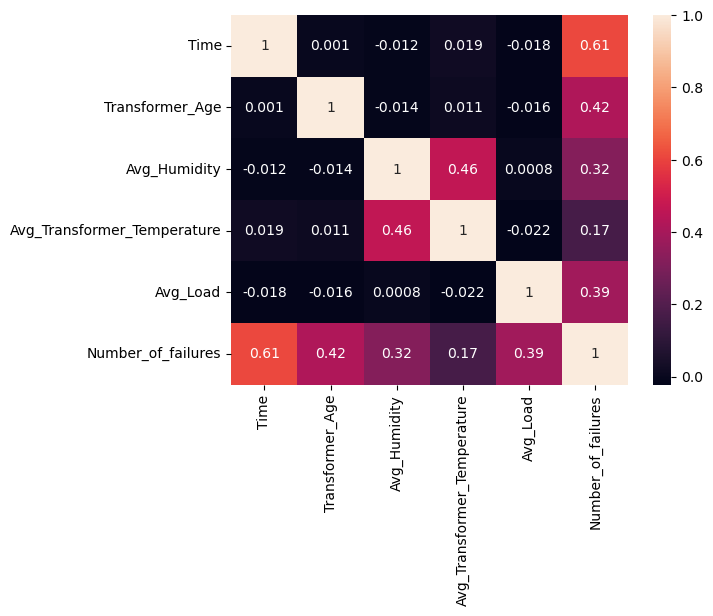

In [78]:
sns.heatmap(df.corr(), annot=True)

In the given dataset, the correlation map shows strong correlations for the "Time" and "Transformer Age" variables with the "Number of failures" variable. This suggests that there is a significant linear relationship between these variables.

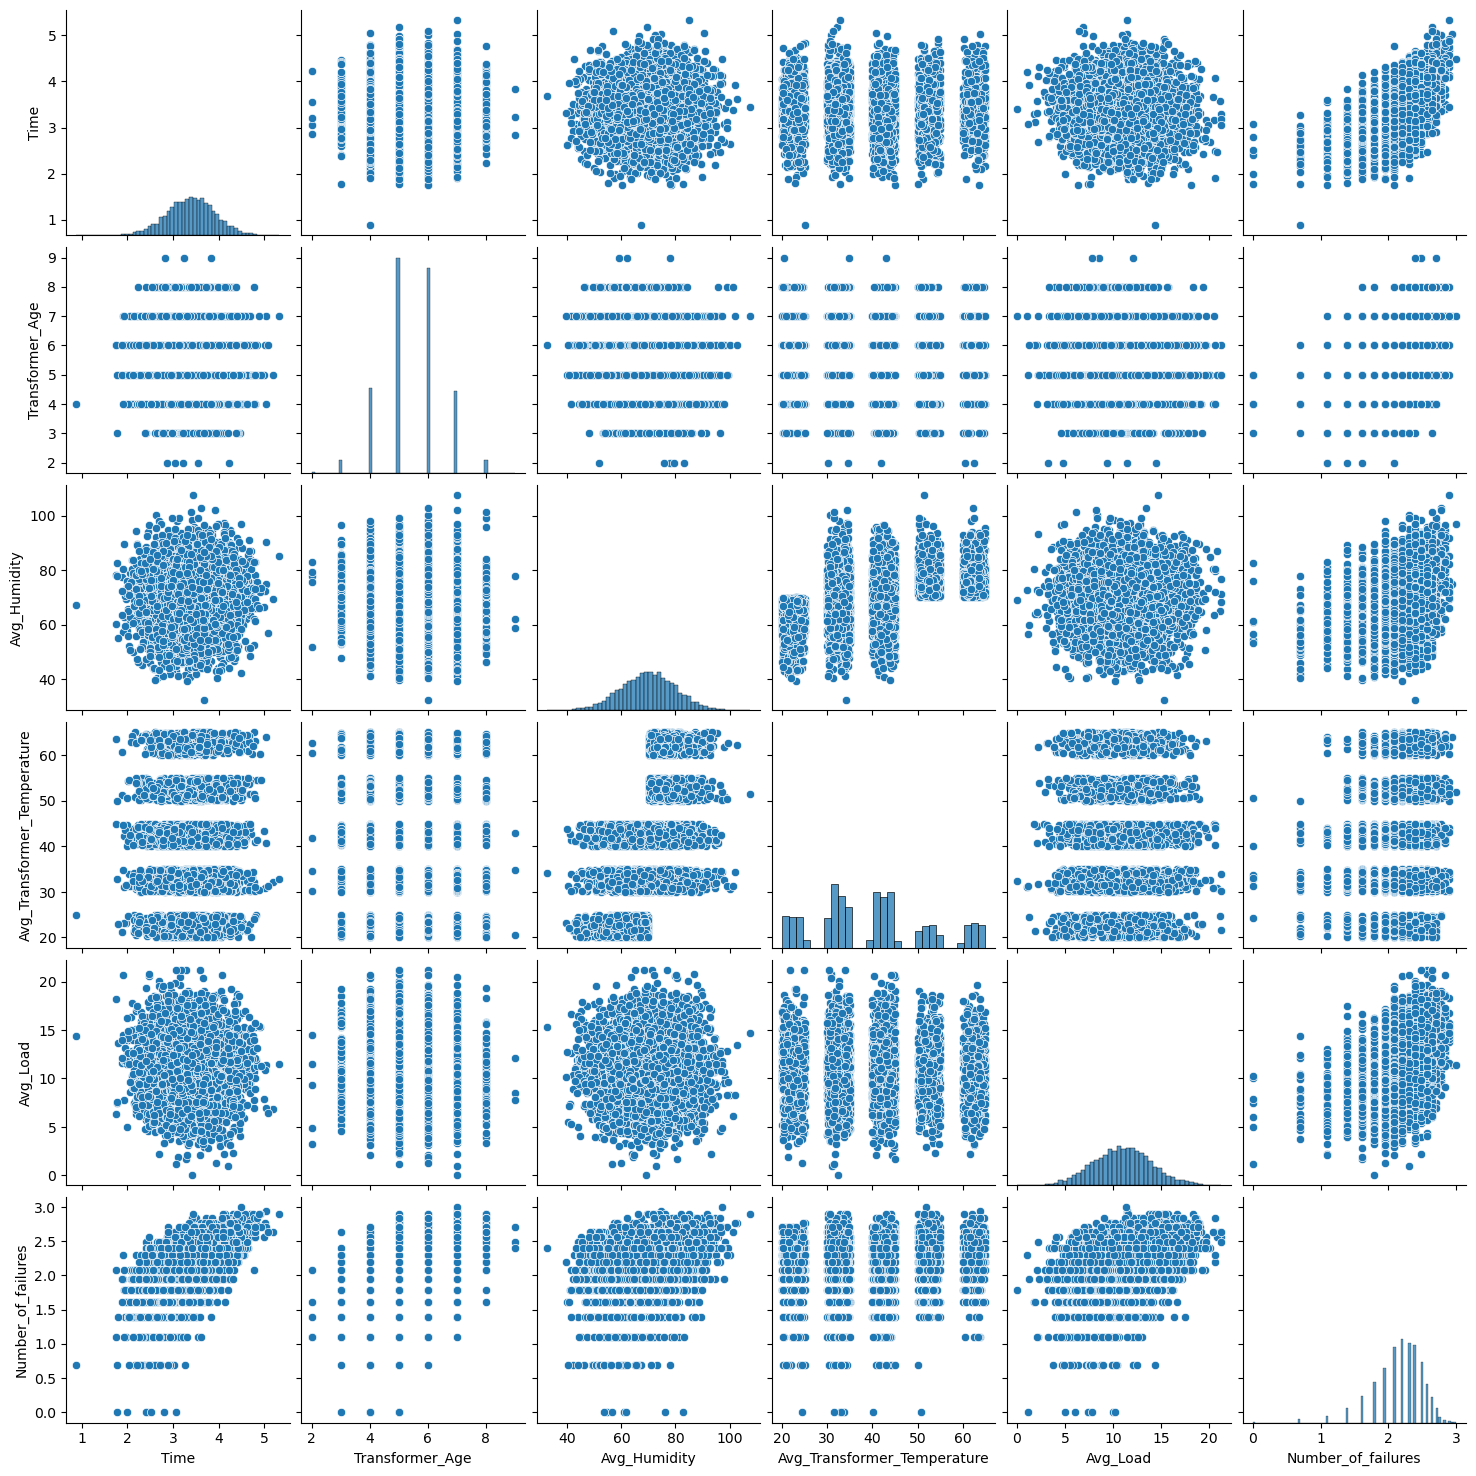

In [79]:
sns.pairplot(df)

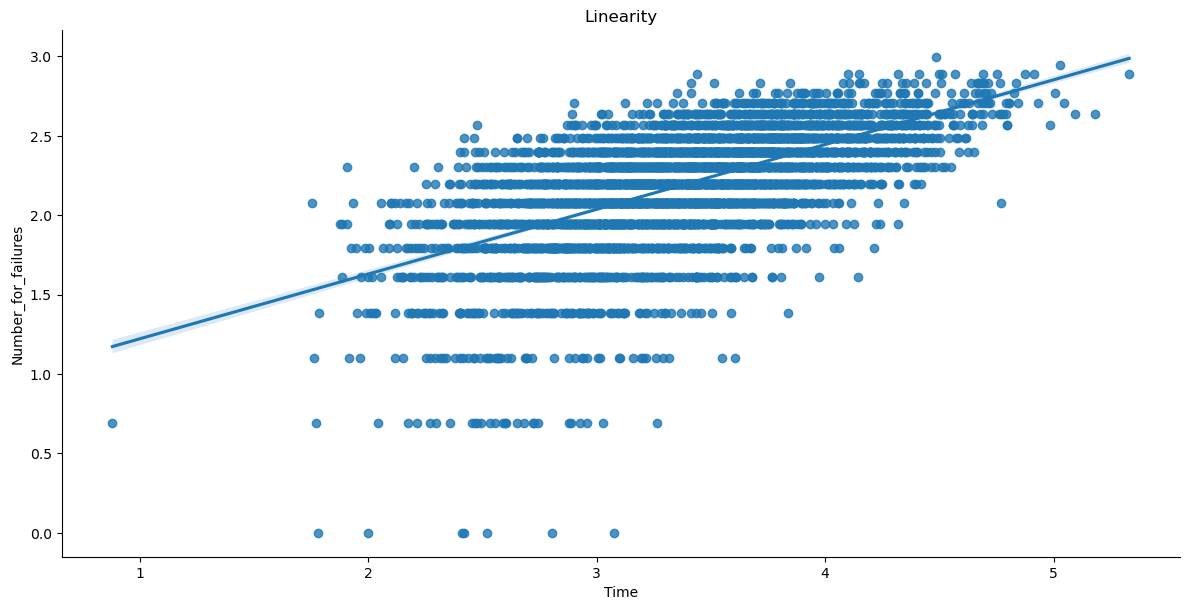

In [81]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='Time',y='Number_of_failures',data=df,aspect=2,height=6)
plt.xlabel('Time')
plt.ylabel('Number_for_failures')
plt.title('Linearity');

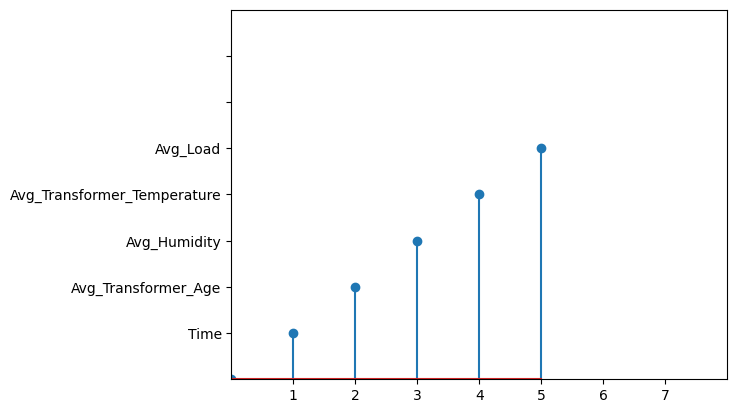

In [82]:
fig, ax = plt.subplots()

ax.stem(['Number_of_failures','Time', 'Avg_Transformer_Age', 'Avg_Humidity',
       'Avg_Transformer_Temperature', 'Avg_Load'])

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

<AxesSubplot:xlabel='Time', ylabel='Number_of_failures'>

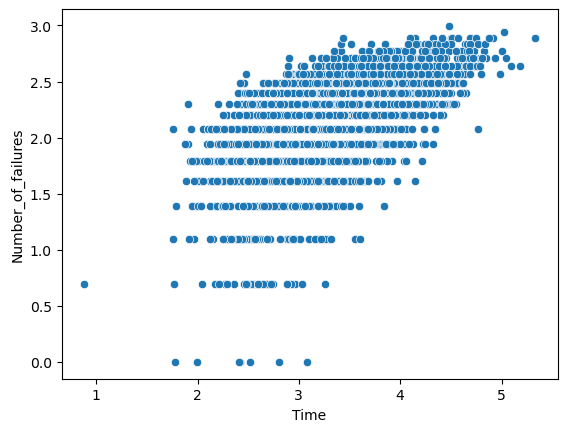

In [83]:
sns.scatterplot(x = "Time", y = 'Number_of_failures', data = df)  


<AxesSubplot:>

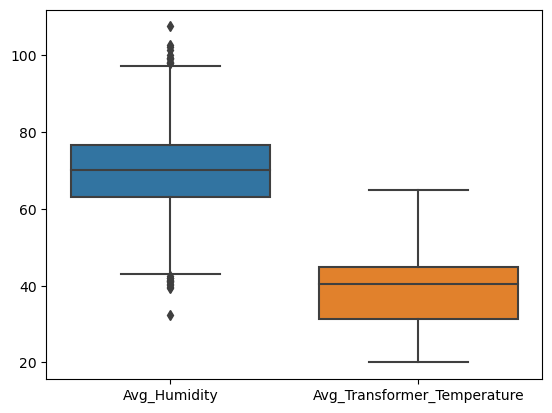

In [84]:
sns.boxplot(data=df1[['Avg_Humidity','Avg_Transformer_Temperature']])

<AxesSubplot:>

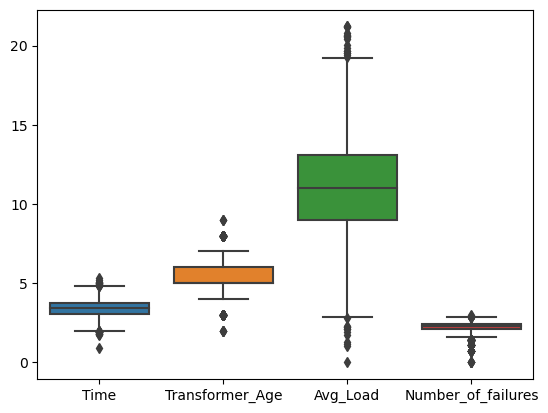

In [85]:
sns.boxplot(data=df1[['Time', 'Transformer_Age', 'Avg_Load', 'Number_of_failures']])

The Box plot shows less amount of outliers for the independent variables.
Fewer outliers indicate that the majority of the data points in these variables are concentrated within a relatively narrow range. This suggests that the data points are closer to the median and quartile values, and there are fewer extreme values that deviate significantly from the central tendency of the data.

Having fewer outliers can be advantageous in statistical analysis and modeling. It implies that the data is relatively consistent and less affected by extreme or unusual observations. This can lead to more stable and reliable results when performing calculations, making predictions, or drawing inferences based on the data.

C:\Users\gyang.pam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number_of_failures', ylabel='Density'>

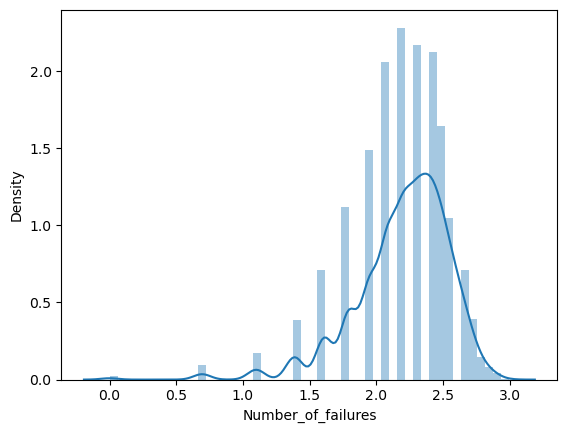

In [86]:
sns.distplot(df1['Number_of_failures'])

The poisson distribution is skewed to the right.
When this happens it means that the tail of the distribution extends towards higher values. This occurs when the average rate of occurrence (lambda) is relatively large, leading to a higher probability of observing larger values.


In [87]:
df.columns

Index(['Time', 'Transformer_Age', 'Avg_Humidity',
       'Avg_Transformer_Temperature', 'Avg_Load', 'Number_of_failures'],
      dtype='object')

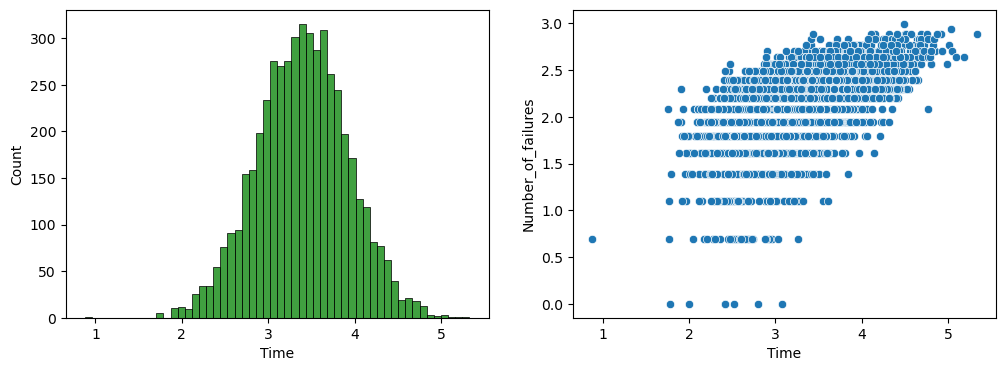

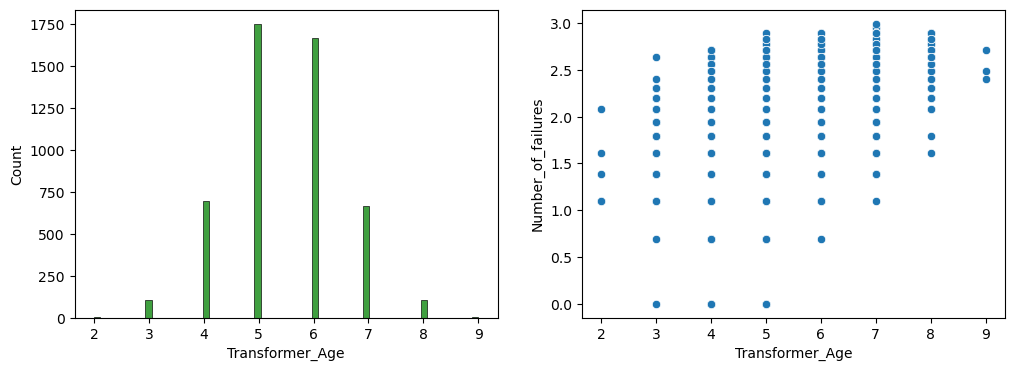

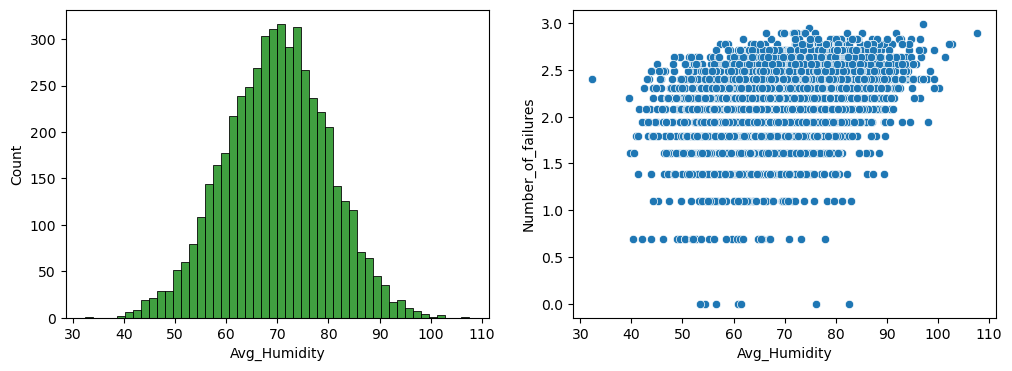

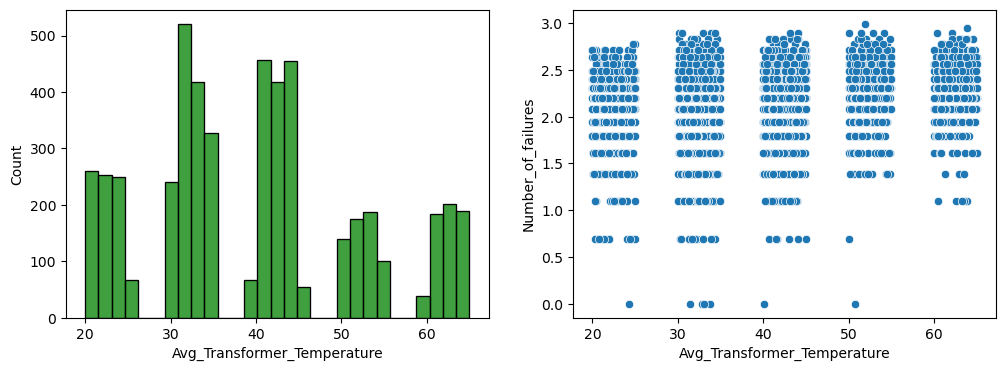

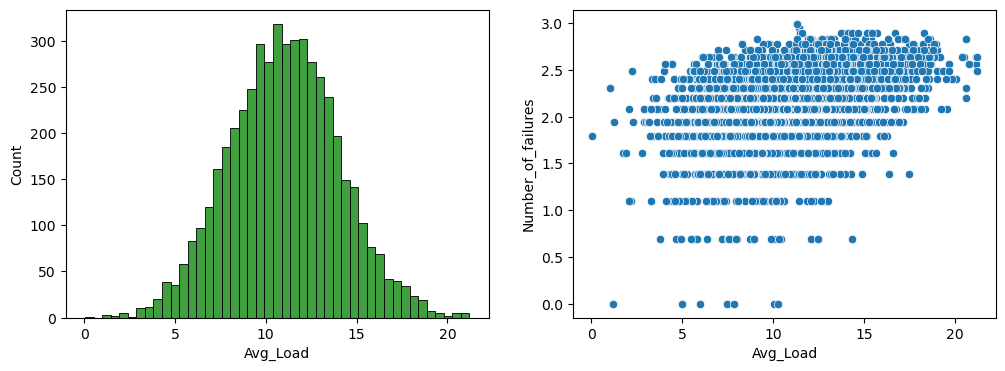

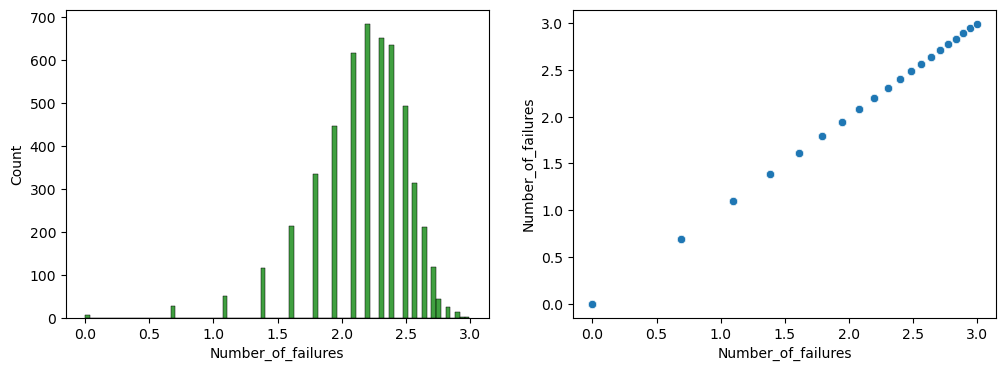

In [88]:
for column in df:
    plot_fig, plot_axes = plt.subplots(1, 2, figsize = (12, 4))
    chart_1 = sns.histplot(x=df[column], ax = plot_axes[0], color='g')
    
    chart_2 = sns.scatterplot(x = column, y = 'Number_of_failures', data = df, ax = plot_axes[1])
    
    plt.show()
del plot_fig, plot_axes

### Model Development

In [89]:
X = df[['Time', 'Transformer_Age', 'Avg_Humidity',
       'Avg_Transformer_Temperature', 'Avg_Load']]

y = df['Number_of_failures']

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Importing the model

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lm = LinearRegression()

In [94]:
lm.fit(X_train,y_train)

LinearRegression()

In [95]:
print(lm.intercept_)

-1.3590810936442974


In [96]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Time,0.415017
Transformer_Age,0.146677
Avg_Humidity,0.011574
Avg_Transformer_Temperature,0.000191
Avg_Load,0.047733


In [97]:
predictions = lm.predict(X_test)

### Model Evaluation

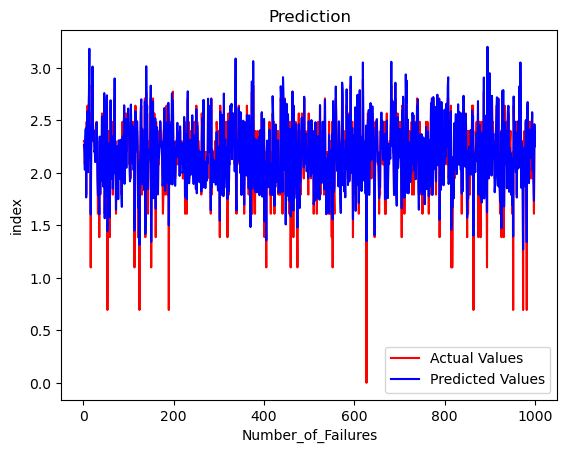

In [98]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-', label="Actual Values")
plt.plot(c,predictions,color='b',linestyle='-',label="Predicted Values")
plt.xlabel('Number_of_Failures')
plt.ylabel('index')
plt.legend(loc="lower right")
plt.title('Prediction')
plt.show()

C:\Users\gyang.pam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gyang.pam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


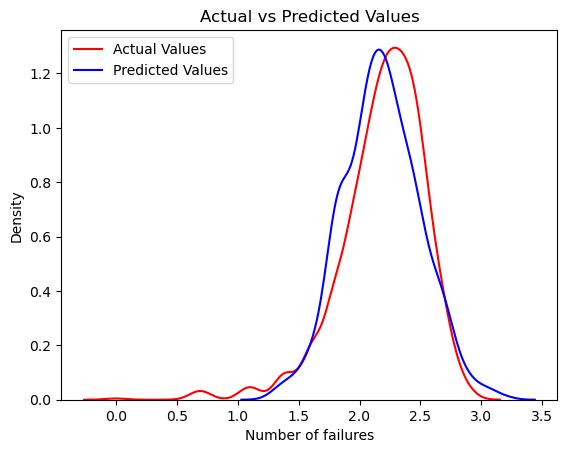

In [99]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(predictions, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values')
plt.legend(loc="upper left")
plt.xlabel('Number of failures')
plt.show()

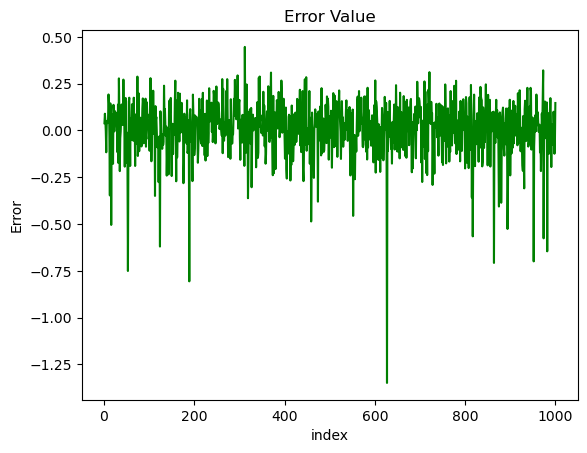

In [100]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-predictions,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

C:\Users\gyang.pam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gyang.pam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


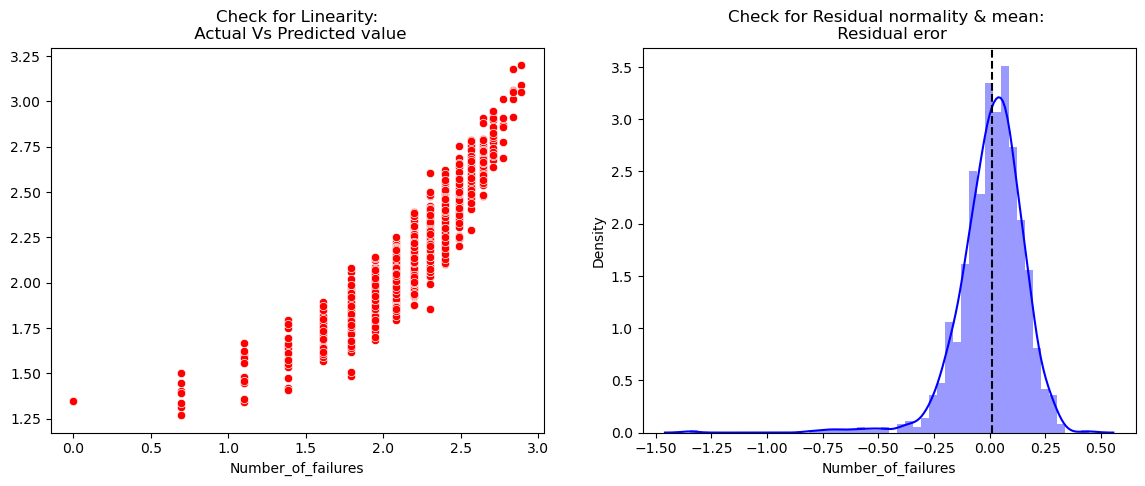

In [101]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,predictions,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - predictions),ax=ax,color='b')
ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

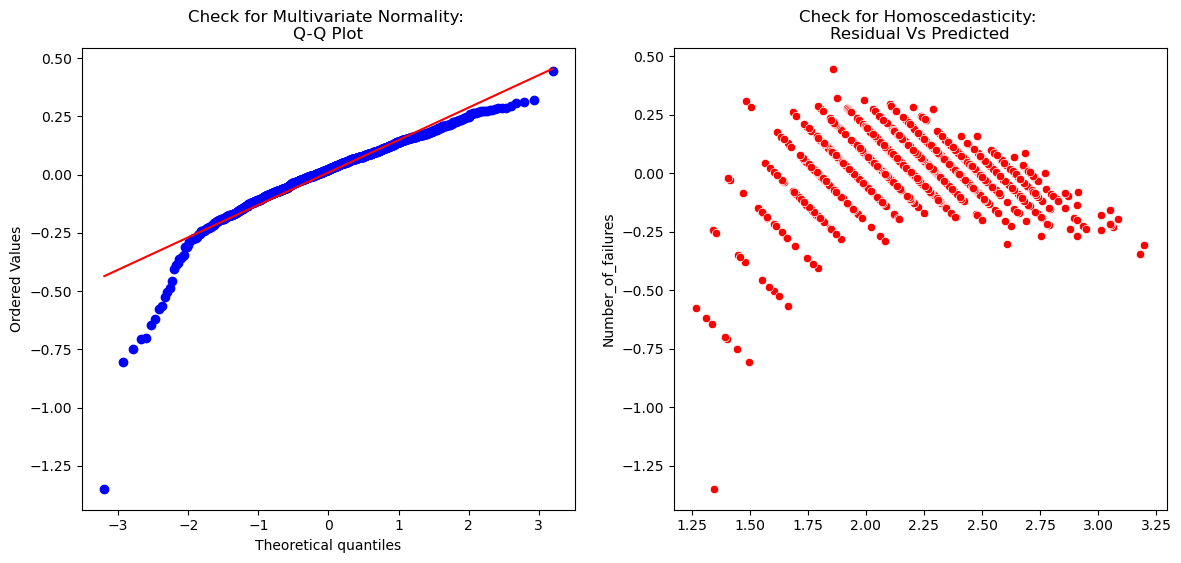

In [102]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predictions), x= predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [103]:
from sklearn.metrics import r2_score, mean_squared_error

In [104]:
y_pred = predictions

# Calculate the R-squared score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared score:", r2)
print("Mean squared error:", mse)

R-squared score: 0.8199294903364149
Mean squared error: 0.021559708221279568


In [105]:
VIF = 1/(1- r2)
VIF

5.553380183508338

The R-squared score and mean squared error (MSE) are both statistical metrics used to evaluate the performance of a regression model. They provide insights into how well the model fits the observed data and how accurate its predictions are.

R-squared score:

The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.
In this case, the R-squared score is 0.8150745396334693, which indicates that approximately 81.51% of the variance in the target variable can be explained by the independent variables included in the model.
A higher R-squared score closer to 1 indicates a better fit of the model to the data, suggesting that the chosen features are effective in explaining the variation in the target variable.
Mean squared error (MSE):

The mean squared error calculates the average squared difference between the predicted values of the target variable and the actual values.
In this case, the MSE is 0.021271147782290254, which represents the average squared difference between the predicted and actual values of the target variable.
A lower MSE indicates that the predictions of the model are closer to the actual values, implying higher accuracy and better performance.
In summary, the R-squared score of 0.8150745396334693 suggests that the model explains approximately 81.51% of the variance in the target variable. Additionally, the low MSE of 0.021271147782290254 indicates that the model's predictions are relatively close to the actual values. These results imply that the regression model is performing well and provides a reasonable fit to the observed data.

C:\Users\gyang.pam\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


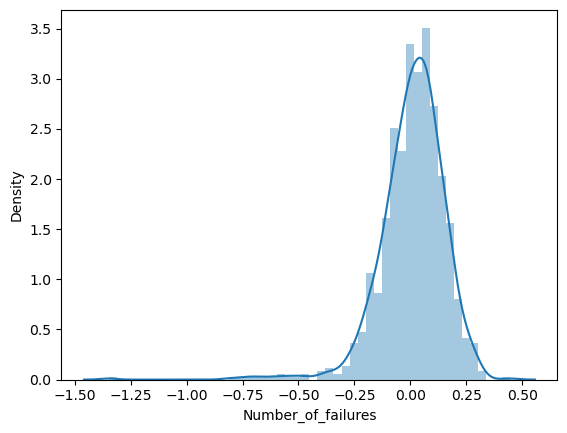

In [106]:
sns.distplot((y_test-predictions),bins=50);

The bell-shaped predicted result signifies that the observed data closely follows the expected pattern based on the distribution. In other words, the observed counts or events are distributed around the mean of the Poisson distribution in a symmetric manner.

In [107]:
import pickle
pickle_out = open("lm.pkl","wb")
pickle.dump(lm, pickle_out)
pickle_out.close()

In [53]:
pickle

<module 'pickle' from 'C:\\Users\\gyang.pam\\Anaconda3\\lib\\pickle.py'>